In [52]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Kullback–Leibler divergence
<br/>
\begin{equation}
\text{For discrete probability distributions P and Q }: \\
D_{KL} (P \left |  \right | Q) = \sum{P(x)} \log\left( \frac{P(x)}{Q(x)} \right )
\end{equation}

<br/>
\begin{equation}
\text{For distributions P and Q of a continuous random variable} \\
D_{KL} (P \left |  \right | Q) =  \int_{a}^{b} {p(x)}  \left(\frac{p(x)}{q(x)} \right ) dx
\end{equation}
<br/>

In [54]:
# dataset_1 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)
# dataset_2 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)

dataset_1 = stats.norm.rvs(size=100, loc=50, scale=5)
dataset_2 = stats.norm.rvs(size=100, loc=60, scale=5)


In [55]:
type(dataset_1)

numpy.ndarray

<Axes: ylabel='Count'>

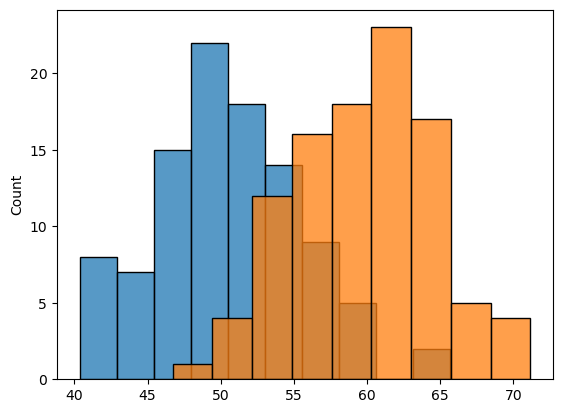

In [56]:
sns.histplot(dataset_1)
sns.histplot(dataset_2)

In [57]:
# Calculate data_1 probabilities as p
p = dataset_1 / np.sum(dataset_1)

# Calculate data_2 probabilities as q
q = dataset_2 / np.sum(dataset_2)

\begin{equation}
\mathrm{kl\_div}(x, y) =
      \begin{cases}
        x \log(x / y) - x + y & x > 0, y > 0 \\
        y & x = 0, y \ge 0 \\
        \infty & \text{otherwise}
      \end{cases}
\end{equation}

In [58]:
# Calculate KL (for discret values)
# NOTE: Logarithm 0 and negative numbers is undefined. So here kl is calculated 
# for both p and q positive values according the formula 

def kl_divergence(p, q):
    kl = np.sum(np.where(np.logical_and( p != 0, q != 0 ), p * np.log(p, q), 0))
    # test the value and explain the result
    # kl = np.sum(p * np.log(p / q, where=((p > 0) & (q > 0))))

    return kl 

In [59]:
kl_divergence(p, q)

-4.600317182115851

------------
### KL with python libraries:

In [60]:
import scipy
kl2 = scipy.special.kl_div(p, q, out=None, where=(p>0) & (q>0))
np.sum(kl2)

-4.600317182115851

### Interpration
* pos:
* 0:
* neg:


_____________________

-----
## Jenson and Shanon